In [95]:
#Import necessary packages
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [57]:
# Defining some global variables
SEED = 42

In [37]:
# Ingest Data
df=pd.read_csv("E:\\Jupyter\\Kaggle\\Housing Prices Competition for Kaggle Learn Users\\train.csv")
X = df.iloc[:,:-1]
# Target Variable - House sale price
y = df.loc[:,['SalePrice']]

In [49]:
# Basic Data Exploration
df.describe()
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
#Step1: Checking for columns with null values
dict_null_cols = {}
list_null_cols = []
list_numeric_cols = []
list_categorical_cols = []

for col in X.columns:
    col_dtype = X[col].dtype
    if (X[col].isnull().sum()>0):
        dict_null_cols[col]=col_dtype
        list_null_cols.append(col)
    elif col_dtype=="O":
        list_categorical_cols.append(col)
    else:
        list_numeric_cols.append(col)

In [55]:
#Step 2: Building initial model on all numerical columns excluding 
feature_list = list_numeric_cols
X_features = X[feature_list]

In [59]:
#Step 3: Define Train & Test Sets
X_train,X_test,y_train,y_test = train_test_split(X_features, y, random_state=SEED, test_size=0.2)

In [60]:
#Step 4: Define a Model
dt = DecisionTreeRegressor(random_state=SEED, max_depth=5)

In [61]:
#Step 5: Fitting the model
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [62]:
#Step 6: Predicting the model on X_test
y_pred = dt.predict(X_test)

In [65]:
#Step 7: Calculating RMSE
model_error = MSE(y_test,y_pred)**(1/2)

In [66]:
model_error

39643.78206774433

In [69]:
y_pred

array([147492.23636364, 434478.33333333, 147492.23636364, 187204.06338028,
       339864.28571429,  94338.15789474, 165342.30769231, 187204.06338028,
        94338.15789474, 129704.11864407, 165342.30769231, 120611.67539267,
        94338.15789474, 222944.67741935, 187204.06338028, 147492.23636364,
       194118.47407407, 147492.23636364, 147492.23636364, 194118.47407407,
       129704.11864407, 253354.34615385, 187204.06338028, 120611.67539267,
       194118.47407407, 147492.23636364, 194118.47407407,  94338.15789474,
       187204.06338028, 194118.47407407, 120611.67539267, 256215.625     ,
       129704.11864407,  94338.15789474, 253354.34615385, 147492.23636364,
       129704.11864407, 194118.47407407, 289155.67857143, 120611.67539267,
       120611.67539267, 256215.625     , 120611.67539267, 337087.42857143,
       147492.23636364, 149404.28571429, 120611.67539267, 120611.67539267,
       425014.47058824, 164977.88461538, 120611.67539267, 187204.06338028,
       120611.67539267, 4

In [70]:
y_test

,SalePrice
892,154500
1105,325000
413,115000
522,159000
1036,315500
614,75500
218,311500
1160,146000
649,84500
887,135500


For Test Data

In [72]:
#Taking Test Data
testdata = pd.read_csv("E://Jupyter//Kaggle//Housing Prices Competition for Kaggle Learn Users//test.csv")

In [77]:
#Select identified features
X_testdata = testdata[feature_list]

In [87]:
#Handling Null values or missing values in test data using Approach2
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_testdata = pd.DataFrame(my_imputer.transform(X_testdata))
imputed_X_testdata.columns = X_testdata.columns

In [89]:
y_predictions = dt.predict(imputed_X_testdata)

In [91]:
output = pd.DataFrame({'Id': testdata.Id,
                       'SalePrice': y_predictions})
output.to_csv('submission1.csv', index=False)

In [92]:
dt.feature_importances_

array([0.        , 0.00227407, 0.74135211, 0.0027947 , 0.01433272,
       0.00133149, 0.0164975 , 0.        , 0.        , 0.04401076,
       0.0135664 , 0.03305091, 0.        , 0.10793888, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0111865 , 0.00382198, 0.00120038,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00664161, 0.        ])

In [93]:
importances_dt = pd.Series(dt.feature_importances_,index=X_testdata.columns)

In [97]:
sorted_importances_dt = importances_dt.sort_values()

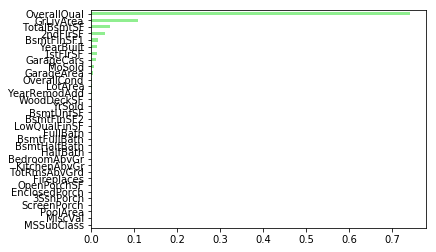

In [98]:
sorted_importances_dt.plot(kind='barh',color='lightgreen')
plt.show()

In [102]:
list1 = []
for col in list_categorical_cols:
    if (X[col].isnull().sum()>0):
        list1.append(col)


In [103]:
list1

[]